In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()   #loading the mnist dataset

#extracting thhe first 200 datasets
x_train=x_train[:200]
y=y_train[:200]

X=x_train.T
X=X/255

y.resize((200,1))
y=y.T

#checking the value
pd.Series(y[0]).value_counts()
#print(y)
#for i in range(y.shape[1]):
#  print(y[0][i])

11490434/11490434 [==============================] - 0s 0us/step


1    26
9    23
0    21
4    21
3    21
7    21
2    20
6    19
8    15
5    13
Name: count, dtype: int64

In [ ]:
#for now focusing on binary classification, to boiuld a simple CNN model, we reduce the image classification from 10 to 2
for i in range(y.shape[1]):
  if y[0][i]>4:
    y[0][i]=1
  else:
    y[0][i]=0

#checking value counts
pd.Series(y[0]).value_counts()


0    109
1     91
Name: count, dtype: int64

In [ ]:
#initializing filters for the Convolution operation

f=np.random.uniform(size=(3,5,5))   #initializing 3 filters of size 5*5 each
f=f.T

print("Filter 0 : ",f[:,:,0],"\n")
print("Filter 1 : ",f[:,:,1],"\n")
print("Filter 2 : ",f[:,:,2],"\n")


Filter 0 :  [[0.4970819  0.71673656 0.68141476 0.59510527 0.75430646]
 [0.91231764 0.87897867 0.19880604 0.22487079 0.68016757]
 [0.58056206 0.83498207 0.48785284 0.47321288 0.33883627]
 [0.70134175 0.41861151 0.66518366 0.36022595 0.77705185]
 [0.72752874 0.48218567 0.45374494 0.67220869 0.64948046]] 

Filter 1 :  [[0.01331843 0.48599699 0.55191866 0.27116776 0.52399978]
 [0.95180725 0.52231024 0.46591604 0.57614826 0.63137289]
 [0.6899153  0.42577856 0.10499971 0.40997173 0.60731725]
 [0.26767731 0.00697886 0.40372564 0.75871476 0.39336882]
 [0.97419343 0.97169289 0.64297878 0.87972592 0.1846455 ]] 

Filter 2 :  [[0.51415549 0.75251689 0.86908479 0.86571155 0.14186552]
 [0.41069853 0.44624416 0.4851618  0.50163491 0.67955524]
 [0.79145484 0.00476469 0.85494318 0.67570775 0.54290798]
 [0.09748014 0.8797803  0.68665977 0.05576663 0.60977245]
 [0.37400345 0.30516894 0.74584607 0.89428146 0.87353958]] 



In [ ]:
X.shape, y.shape, f.shape #According to its o/p, for each of the 200 28*28 images, we have one class specified, thus dimennsion if y(1,200),
                          # we implement it using 3 filters of 5*5 dimensions

((28, 28, 200), (1, 200), (5, 5, 3))

In [ ]:
#for the image filter convolution we divide the image into multiple patces
#here we pass the filter for  convolution

new_img=[]

#for number of images
for k in range(X.shape[2]):
  #sliding the filter in horizontal direction
  for i in range(X.shape[0]-f.shape[0]+1):
    #sliding the filter in vertical direction
    for j in range(X.shape[1]-f.shape[1]+1):
      new_img.append(X[:,:,k][i:i+f.shape[0],j:j+f.shape[1]])

#resize the generated patches as per number of images
new_img=np.array(new_img)
new_img.resize((X.shape[2],int(new_img.shape[0]/X.shape[2]),new_img.shape[1],new_img.shape[2]))
new_img.shape


(200, 576, 5, 5)

(<Axes: >, <matplotlib.image.AxesImage at 0x7c3511b4d540>)

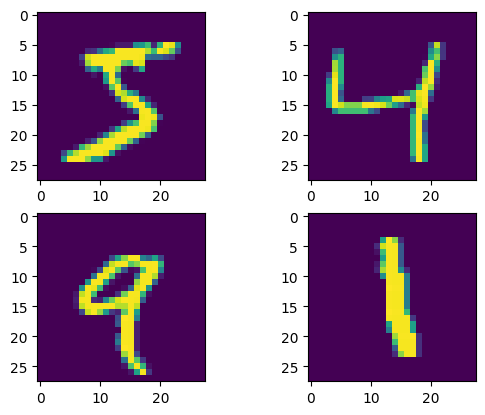

In [ ]:
import matplotlib.pyplot as plt
i=0
plt.subplot(221), plt.imshow(x_train[i])
i+=2
plt.subplot(222), plt.imshow(x_train[i])
i+=2
plt.subplot(223), plt.imshow(x_train[i])
i+=2
plt.subplot(224), plt.imshow(x_train[i])

In [ ]:
#now, moving up with forward  propagation
#number of features in the data set

s_row=X.shape[0]-f.shape[0] +1
s_col=X.shape[1]-f.shape[1] +1

num_filter=f.shape[2]
input_layer_neurons=(s_row)*(s_col)*num_filter
output_layer_neurons=1

#initialize weight
w=np.random.uniform(size=(input_layer_neurons,output_layer_neurons))


In [ ]:
#defining the Sigmoid Function
def sigmoid (x):
  return 1/(1 + np.exp(-x))
# derivative of Sigmoid Function
def derivatives_sigmoid(x):
  return x*(1-x)

In [ ]:
# generating output of convolution layer
filter_output = []
# for each image
for i in range(len(new_img)):

  # apply each filter
  for k in range(f.shape[2]):
    # do element wise multiplication
    for j in range(new_img.shape[1]):
      filter_output.append((new_img[i][j]*f[:,:,k]).sum())

filter_output = np.resize(np.array (filter_output), (len(new_img), f.shape[2], new_img.shape[1]))
# applying activation over convolution output to introduce non-linearity to the data
# what is the use of activation function
'''
The activation function decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias to it.
The purpose of the activation function is to introduce non-linearity into the output of a neuron.

Explanation: We know, the neural network has neurons that work in correspondence with weight, bias, and their respective activation function.
In a neural network, we would update the weights and biases of the neurons on the basis of the error at the output. This process is known as
back-propagation. Activation functions make the back-propagation possible since the gradients are supplied along with the error to update the
weights and biases.
'''
#thus here the activation function is implemented via sigmoid function i.e. f(x)=1/(1+e^(-x))
filter_output_sigmoid=sigmoid(filter_output)

filter_output.shape, filter_output_sigmoid.shape

((200, 3, 576), (200, 3, 576))

In [ ]:
# generating input for fully connected layer
filter_output_sigmoid = filter_output_sigmoid.reshape((
    filter_output_sigmoid.shape[0],
    filter_output_sigmoid.shape[1]*filter_output_sigmoid.shape[2]
    ))
filter_output_sigmoid = filter_output_sigmoid.T

# Initialize weights for the fully connected layer - make sure the dimensions are correct!
wo = np.random.uniform(size=(filter_output_sigmoid.shape[0], output_layer_neurons))

#Linear trasnformation for fully Connected Layer
output_layer_input=np.dot(wo.T, filter_output_sigmoid)
output_layer_input=(output_layer_input - np.average(output_layer_input))/np.std(output_layer_input)
#activation function
output = sigmoid (output_layer_input)

In [ ]:
#Error
error = np.square(y-output)/2

#Error w.r.t Output (Gradient)
error_wrt_output = -(y-output)
#Error w.r.t sigmoid transformation (output_layer_input)
output_wrt_output_layer_input=output*(1-output)

#Error w.r.t weight
output_wrt_w=filter_output_sigmoid

In [ ]:
#Error w.r.t sigmoid output
output_layer_input_wrt_filter_output_sigmoid= wo.T
#Error w.r.t sigmoid transformation
filter_output_sigmoid_wrt_filter_output = filter_output_sigmoid*(1-filter_output_sigmoid)
# calculating derivatives for backprop convolution
error_wrt_filter_output = np.dot(output_layer_input_wrt_filter_output_sigmoid.T,
                                 error_wrt_output*output_wrt_output_layer_input)*filter_output_sigmoid_wrt_filter_output
error_wrt_filter_output = np.average (error_wrt_filter_output, axis=1)
error_wrt_filter_output = np.resize(error_wrt_filter_output,
(X.shape[0]-f.shape[0]+1, X.shape[1]-f.shape[1]+1, f.shape[2]))

In [ ]:
filter_update = []
for i in range(f.shape[2]):
  for j in range(f.shape[0]):
    for k in range(f.shape[1]):
      temp = 0
      spos_row = j
      spos_col = k
      epos_row = spos_row + s_row
      epos_col = spos_col + s_col
      for l in range(X.shape[2]):
        temp = temp + (X[spos_row: epos_row, spos_col: epos_col, l]*error_wrt_filter_output[:,:,i]).sum()
        filter_update.append(temp/X.shape[2])
filter_update_array = np.array (filter_update)
filter_update_array = np.resize(filter_update_array, (f.shape[2], f.shape[0], f.shape[1]))

In [ ]:
#now, having the gradient we use it to correct the error

lr=0.05   #learning rate
for i in range(f.shape[2]):
  f[:,:,i]=f[:,:,i]-lr*filter_update_array[i]

for i in range(f.shape[2]):
  print(f[:,:,i])

[[0.49715282 0.71688589 0.68158939 0.59531489 0.75456853]
 [0.91264936 0.87935967 0.19927638 0.2253754  0.68071076]
 [0.58118655 0.83562533 0.48858554 0.47400535 0.33966529]
 [0.7022157  0.4195499  0.66618069 0.36125318 0.77810737]
 [0.72866687 0.48340252 0.45499112 0.6734899  0.6508066 ]]
[[0.01474031 0.48745304 0.55348241 0.27282066 0.52568094]
 [0.95354372 0.52412944 0.46776565 0.57803321 0.63333027]
 [0.69190291 0.42783712 0.10713508 0.41216107 0.60955912]
 [0.26996359 0.00933014 0.40610765 0.76114046 0.39583199]
 [0.97671548 0.97426489 0.64559851 0.88238002 0.18738605]]
[[0.51693934 0.7553994  0.87201669 0.8686745  0.14488515]
 [0.4137872  0.44942317 0.48838162 0.50493817 0.68289567]
 [0.79485907 0.00820228 0.85845301 0.67932238 0.54656903]
 [0.10116719 0.88352329 0.69043183 0.05959923 0.61368811]
 [0.377971   0.30916289 0.7498756  0.89835775 0.87767894]]
